In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

The model helps us determine the amount of salary a new employee will get depending on the year of experience

In [5]:
#importing the dataset and extracting the dependant and independent variables
salary_data = pd.read_csv(r'C:\Users\Robinson\Desktop\mlsimplilearn\Salary_Data.csv')
x = salary_data.iloc[:, :-1].values
y = salary_data.iloc[:, 1].values

In [9]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

# Visualising the dataset

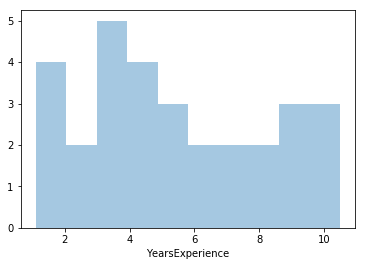

In [13]:
sns.distplot(salary_data['YearsExperience'],kde=False,bins=10)

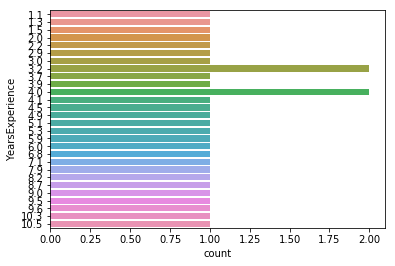

In [14]:
sns.countplot(y='YearsExperience', data=salary_data)

C:\Users\Robinson\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


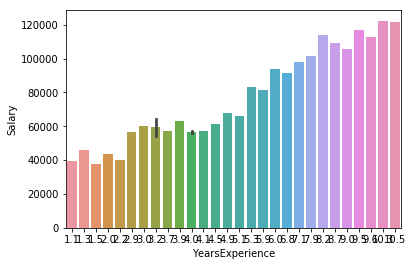

In [15]:
sns.barplot(x='YearsExperience',y='Salary', data=salary_data)

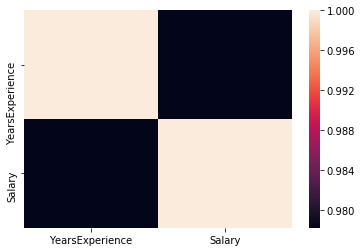

In [17]:
sns.heatmap(salary_data.corr())

#Splitting the dataset into the Training set and Test set

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state=0)

# Fitting Simple Linear Regression to the Training set

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Predicting the Test set results

In [20]:
y_pred = lr.predict(x_test)
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

# Visualising the Training set results

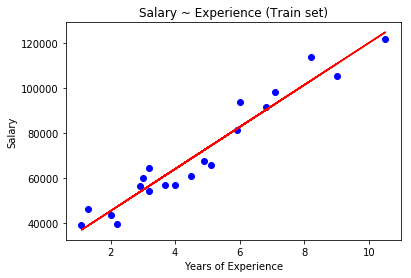

In [22]:
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, lr.predict(x_train), color = 'red')
plt.title('Salary ~ Experience (Train set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results

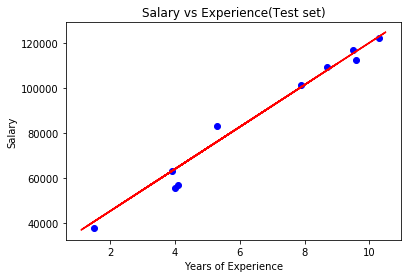

In [23]:
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_train, lr.predict(x_train), color = 'red')
plt.title('Salary vs Experience(Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Finding the Residuals

In [27]:
#Calculating the Residuals
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

MAE: 3426.42693743071
MSE: 21026037.329511303
RMSE: 58.535689433291125
